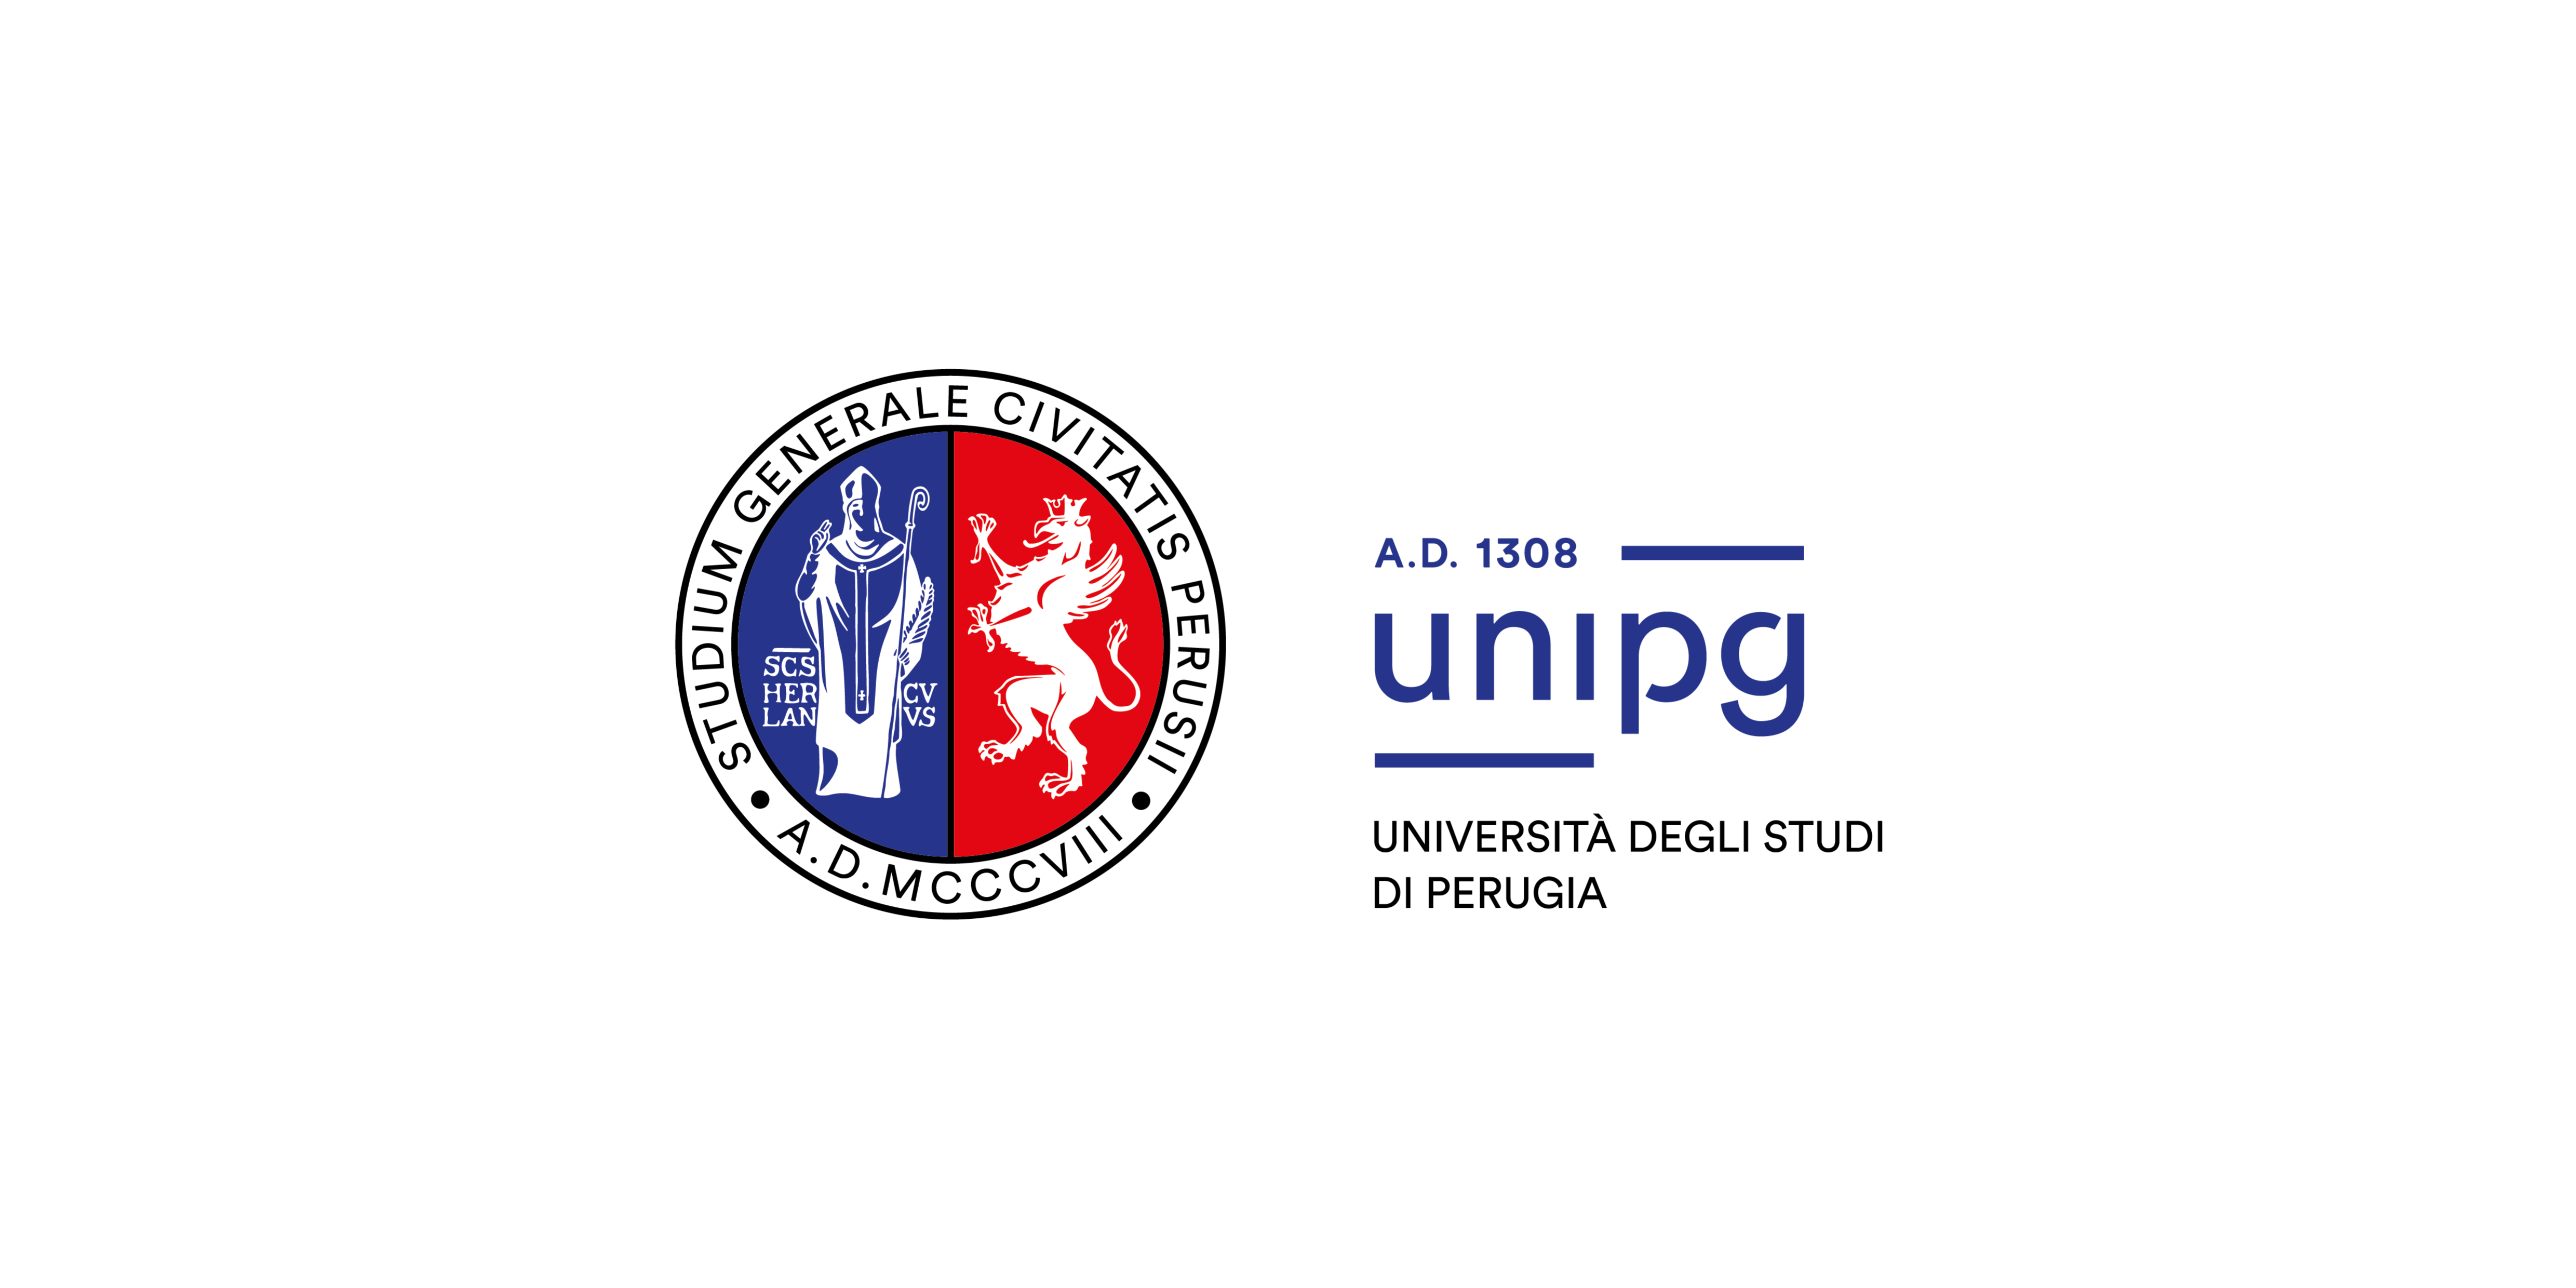

# **Progetto del corso Machine Learning**

## Relazione progetto: Evalita GeoLingIT

## **Introduzione**


La traccia del progetto mira allo svolgimento e risoluzione di un specifico task appartenente alla campagna EVALITA 2023.

EVALITA è una campagna di valutazione periodica di NLP e vocale per la lingua italiana.
L'obbiettivo è quello di far progredire l'elaborazione del linguaggio naturale (NLP) nel trattare il linguaggio non standard e sulle variazioni linguistiche italiane derivanti da analisi quantitative su larga scala.

## **Specifiche del task**

il progetto è denomitato **GeoLingIt**, è ed suddiviso principalmente in due sub-task. In entrambi task, il compito è quello di classificare la provenienza di determinate dichiarazioni, frasi, citazioni ecc.. (tra cui **tweets**).
**Il sub-task scelto è il tipo A** (grana-grossa) in cui bisogna **classificare la regione di appartenenza dei tweets** di linguaggio non standard dati in input; mentre nel sub-task B il compito era quello di determinare le coordinate geografiche del tweet, andando quindi più nello specifico su un compito più complesso.

Per la valutazione del task scelto, la challenge propone di seguire per i modelli la **macro f1 score** (precision e recall saranno metriche di supporto) su un sottoinsieme di regioni italiani casuali:
- 13 regioni già valutabili in fase di development;
- 13 più altre regioni variabili tra 1 e 7 in fase di testing.

Con questa strutturazione si vuol che il modello/i sviluppati possono quindi essere in grado di generalizzare in modo ottimale.

## **Tecnologie utilizzate**

La realizzazione del progetto è stato svolto utilizzando il linguaggio Python e le librerie di riferimento e di supporto per il machine learning e per l'apprendimento automatico come: numpy, pandas, spaCY, sklearn, keras, tensorflow, matplotlib, seaborn. Come piattaforma di sviluppo è stata usata Google Colab per semplicare l'utilizzo di CPU e RAM per l'elaborazione dei dati e l'allenamento dei modelli.

## **Dataset**

I dati di GeoLingIt  forniti comprendono i post geo-taggati di Twitter (tweet) che presentano un uso non standard della lingua italiana. Ogni tweet ha associato informazioni sulla latitudine, longitudine e nome del luogo che rientrano nel territorio italiano.

I dati sono interamente incentrati sull'Italia e sull'uso di linguaggio dialettale, quindi i risultati saranno incentrati sulla variazione del linguaggio piuttosto che su elementi lessicali altamente localizzati (ad esempio, menzioni di eventi, luoghi o attrazioni turistiche).


La variazione non standard nei dati di GeoLingIt può manifestarsi con singole parole o frasi:
- con elementi in una lingua locale, o sinonimi regionali come "guaglione", "toso", "picciotto" per giovanotto
- con il code-switching (ad esempio, l'alternanza di italiano standard e di una lingua locale, un dialetto o una variante regionale)
- come interi post scritti in una specifica lingua o dialetto locale.
___
**STRUTTURA DASET**

**Per il task A abbiamo i dataset  formati** esattamente con:
- ***id*** del tweet
- ***text***: testo del tweet (nomi, menzioni, email e URL sono anonimizzati)
- ***region***: label che identifica la regione di provenienza del tweet

I dataset forniti per il task sono suddivisi in:
- **train.tsv**: training set composto da ***13600 tweet***, da utilizzare per la progettazione e allenamento dei modelli;
- **dev.tsv**: development set composto da ***512 tweet***, utile per valutare la prestazione dei modelli in fase di sviluppo;
- **test.tsv**: test set composto da ***818 tweet***, da usare per valutare i modelli finali e per generare le etichette finali per la valutazione del task.

### Analisi Dataset

I dataset forniti inizialmente dalla challenge erano quelli di ***training*** e di ***development***(ossia di *validation*); entrambi i set di dati, come descritto anche dagli autori del task, sono già stati pre-selezionati e non presentano al loro interno dati mancanti o dati duplicati. Quindi, per i dati, è stato solamente necessario andarli analizzare e vedere le loro caratteristiche; successivamente, per renderli pronti per essere passati come input per i modelli, è stato effettuato un processo di cleaning e di embedding.

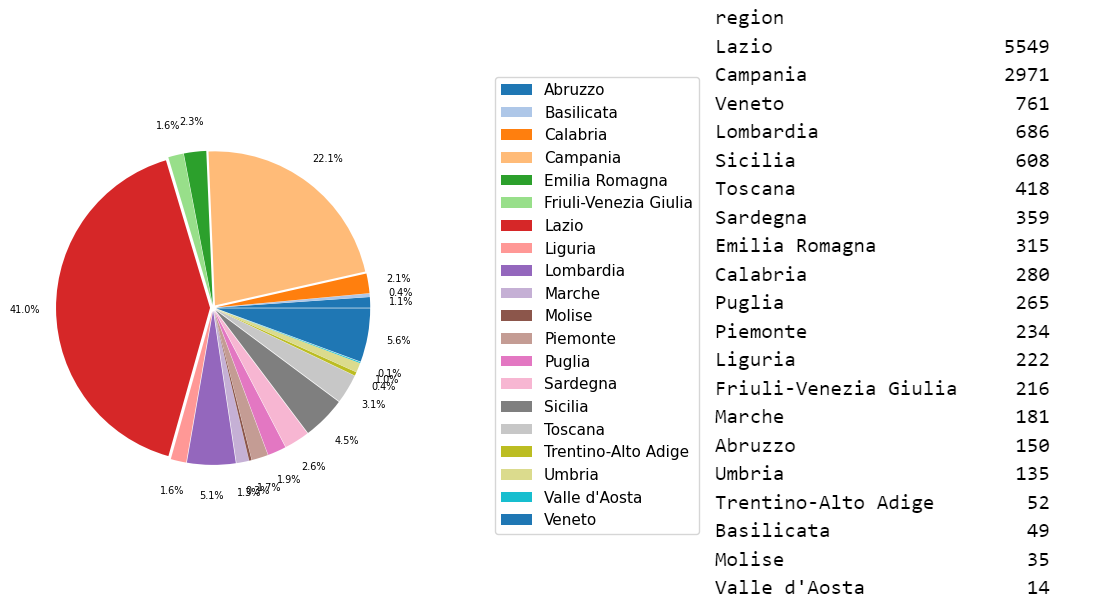

Il grafico a torta in figura, mostra la distribuzione delle labels nel dataset di training. Si nota facilmente che il dataset risulta molto sbilanciato a favore di tweet di dialetto targato "Lazio"; il dialetto Campano, invece, con il 22% degli esempi nel set, è la seconda labels più presente.

Per il resto, le altre regioni italiane sono rappresentante da un basso numero di esempi. Tuttavia questa distribuzione non è isuale perchè dialetti di origine laziale o campano sono tra i più popolari in tutta l'Italia.

Questo sbilanciamento degli esempi nel training test potrebbe portare imprecisione ai modelli a non poter classificare correttamente, sopratutto quando abbiamo a che fare con l'identificazione di dialetti di naturala simili o di vicinanza locali (ad esempio dialetto romano con umbro, toscano e marchigiano; oppure dialetto veneto con dialetto friuliano). Infatti diverse frasi nel dataset utilizzano vocabili di natura simile, ma la loro classificazione risulta diversa.

Ulteriori analisi approfondite riguardano la sintassi e le singole parole all'interno dei testi. Le frasi in esempio essendo di natura non-standard, prendono una rilevante importantanza per il loro utilizzo di vocabili "a doc" specifici per i diversi dialetti italiani. Al di fuori delle classiche "Stop Word", tutte le singole parole, parole con particolari accenti,
 verbi, aggettivi e articoli sono rilevanti e influenzano la classificazione finale.

 Alcuni esempi che sono stati trovati (e che non sono stati eliminati) sono caratterizzati da vocaboli con consonanti/e vocali con accenti particolari:

| text     | region |
|-------------------------|------------|
| Working on a new video for our YouTube channel! Da**û**r di v**ô**re cun un gnûf video pal nestri cjan**â**l youtube! Al lavoro su un nuovo video per il nostro canale youtube    | Friuli-Venezia Giulia  |
| dunque, secondo i ma**î**tre **à** penser del tifo bianconero, se stasera non si vince è perché gioca Buffon, il quale ha obbligato il suo allenatore a farlo giocare al Camp Nou. |       Piemonte |
|Bevi bru**ł**é che bon che l'è! El bru**ł**é sel beve poc sto ano, l'è bon dopo 'na siada in montagna o'na dornada a tajar vide, ma dentro casa ne tocà star. Bravi, bello sentire l'armonia della propria "**łengua**"| Veneto |

Oltre a tener conto dell'importanza sintattica delle singole parole, un ulteriore attenzione è stata data sul frequente utilizzo degli apostrofi. Gli apostrofi vengono utilizzati sia per specificare un "detto" oppure una citazione, ma molte volte sono utilizzati all'interno delle parole. Quest'ultimo utilizzo comporta a dover tener traccia di queste particolari parole che possono aumentare il dominio del vocabolario lessicale per i modelli

|Alcuni esempi di tweet con l'uso di apostrofi|
|---------------------------------------------|
| **oi stefà nuij subba 'a salerno reggio calabria usamu 'u ciucciu ccu 'i cavaddri trainu spisa d'arretu** |
| **vai marta cortina füma ‘l mundial demönt bocca lupo**     |
|**buongiorno chiov’ tutt jurnat’ c’è serv’ o mbrell’**|
|**vabbè n'agg idè**|
|**fa’ el ganassa masim t’è disfà lett**|
|**ah qul lì l'era n'elenc gnugnu anduma bin tses propi n'amisa**|

### **Model Development**

Per la realizzazione dei modelli, essendo nell'ambito NLP (na-
tural languange processing), si è seguito un procedimento di sviluppo inerente e riferente anche
all’obbiettivo di text classification.

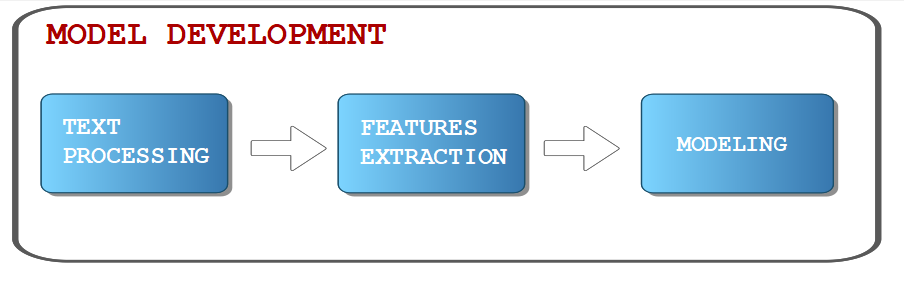

- **Text Processing**: fase in cui vengono puliti e normalizzati i testi.
- **Features Extraction**: fase in cui vengono generate le features per il modello; qui
vengono le features vengono anche vettorizzate o tokenizzate pronte per essere date
come input al modello.
- **Modelling**: fase in cui vengono definiti i vari modelli utilizzati (tra cui le baselines).

### **Text Processing**

Nella fase di text processing si è andati a lavorare direttamente sui testi dei dataset forniti. L'obbiettivo è quello di "semplificare" i testi preparandoli poi per l'embedding.

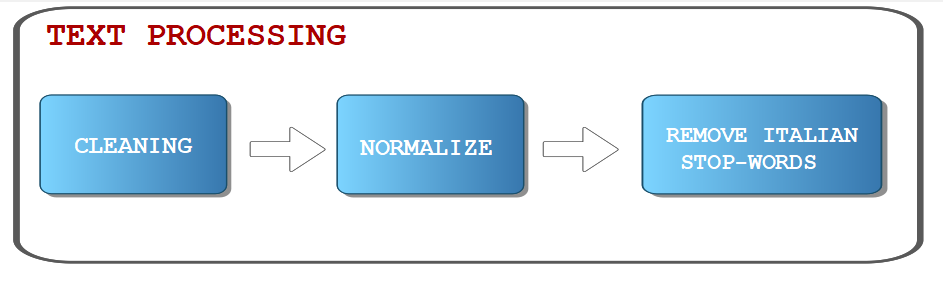

- **processo di cleaning**: i testi vengono puliti da simboli parole non alfabetiche, caratteri speciali, caratteri ripetuti e anche da parole personalizze.
- **processo di normalize**: i testi vengono "normalizzati" in cui vengono trasformati in carattere minuscoli e rimossi i caratteri di punteggiatura.
- **rimozione "Stop Words"**: all'interno dei testi vengono eliminate una lista di parole che non influenzano il significato di classificazione di una frase: alcuni esempi sono gli articoli, verbi essere/avere e congunzioni.




Tutti questi procedimenti di pulizia del testo sono stati implementanti all'interno di un metodo chiamato ***cleaner***

A scopo sperimentale, il metodo **cleaner** è stato implementato per due tipi di pre-processing per il testo:


1.   Il primo, utilizza tutti i processi di cleaning e normalization standard, che portano alla massima semplificazione del testo in chiaro
2.   Il secondo, a differenza del primo, lascia all'interno del testo tutti i tipi di **apostrofi**

Utilizzando questi due tipi di pre-processing si può valutare effettivamente la differenza e l'importanza che riescono ad interpretare i modelli realizzati.



```
# 1° TIPO DI PRE-PROCESSING
# - CLEANING STANDARD
def cleaner(tweet):
    print(tweet)
    ctweet = tweet
    ctweet = ctweet.translate(string.punctuation)
    ctweet = ctweet.lower().split() # to lowercase and split
    ctweet = " ".join(ctweet)
    ctweet = re.sub(r"@[^A-Za-z0-9^,!.\/'+-=]+", " ", ctweet) #Remove special char
    ctweet = re.sub("#[A-Za-z0-9_]+", " ", ctweet)
    ctweet = re.sub(r"[.?!]*(?=[.?!]$)", " ", ctweet)
    ctweet = re.sub(f"[{re.escape(punctuation)}]", " ", ctweet) #remove punctuaction
    ctweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", ctweet) #remove http links
    ctweet = re.sub(r'(.)\1{2,}',r'\1', ctweet) #remove repetead caracter
    ctweet = re.sub(r"\b[0-9]+\b\s*", " ", ctweet) #remove numbers
    ctweet = re.sub("\S*\d\S*", " ", ctweet).strip() #remove words with numbers
    # ------------ RIMOZIONE APOSTROFI -----------------------
    ctweet = re.sub(r"“", " ", ctweet)
    ctweet = re.sub(r"”", " ", ctweet)
    ctweet = re.sub(r"‘", " ", ctweet)
    ctweet = re.sub(r"’", " ", ctweet)
    ctweet = re.sub(r"′", " ", ctweet)
    ctweet = re.sub(r"…", " ", ctweet)
    ctweet = re.sub(r"«", " ", ctweet)
    ctweet = re.sub(r"»", " ", ctweet)
    ctweet = re.sub(r"x", " ", ctweet)
    ctweet = re.sub(r"xe", " ", ctweet)
    ctweet = re.sub(r"xo", " ", ctweet)
    ctweet = re.sub(r"xd", " ", ctweet)
    ctweet = re.sub(r"user", " ", ctweet)
    ctweet = re.sub(r"url", " ", ctweet)
    # ---- remove particolar chars of dataset ----
    ctweet = re.sub(r"•", " ", ctweet)
    ctweet = re.sub(r"°", " ", ctweet)
    ctweet = re.sub(r"▪", " ", ctweet)
    ctweet = re.sub(r"€¥¢¿¶§×", " ", ctweet)
    ctweet = re.sub(r"porc ¥¢ ¶§×", " ", ctweet)
    ctweet = re.sub(r"€", " ", ctweet)
    ctweet = re.sub(r"¿", " ", ctweet)
    ctweet = re.sub(r"°c", " ", ctweet)
    ctweet = re.sub(r"三国", " ", ctweet)
    ctweet = re.sub(r"ĺ", "l", ctweet)
    ctweet = re.sub(r"aa", "a", ctweet)
    ctweet = re.sub(r"æ", "a", ctweet)
    ctweet = re.sub(r"ıbrıszaferedoğru", " ", ctweet)
    ctweet = re.sub(r"pepepepepepepepepepepe", " ", ctweet)
    ctweet = re.sub(r"ècallejon", " ", ctweet)
    ctweet = re.sub(r"çayoğlu", " ", ctweet)
    ctweet = re.sub(r"çalkapımı", " ", ctweet)
    ctweet = re.sub(r"çajuve", " ", ctweet)
    ctweet = re.sub(r'\b(a*ha+h[ha]*|o?l+o+l+[ol]*)\b', " ", ctweet) #remove some laugh exclamation
    ctweet = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",ctweet) if s]) #split attached words
    ctweet = " ".join(ctweet.split()) #remove extra space
    words = ctweet.split()
    ctweet =" ".join(sorted(set(words), key=words.index)) #remove repeated words
    ctweet = emoji.replace_emoji(ctweet, replace=' ')
    ctweet = ctweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    #remove italian stop words
    #sw = set(stopwords.words("italian"))
    words = ctweet.split()
    clean_words = [w for w in words if not w in it_stop] #remove italian stop words
    ctweet = " ".join(clean_words)
    print(ctweet)
    print("\n")
    return ctweet

# 2° TIPO DI PRE-PROCESSING
# GLI APOSTROFI VENGONO MANTENUTI
def cleaner_2(tweet):
    print(tweet)
    ctweet = tweet

    my_punctuation = punctuation.replace("'", "")
    ctweet = ctweet.translate(string.punctuation) #remove punctuation
    ctweet = ctweet.lower().split() # to lowercase and split
    ctweet = " ".join(ctweet)
    ctweet = re.sub(r"@[^A-Za-z0-9^,!.\/'+-=]+", " ", ctweet) #Remove sign special
    ctweet = re.sub("#[A-Za-z0-9_]+", " ", ctweet)
    ctweet = re.sub(r"[.?!]*(?=[.?!]$)", " ", ctweet)
    ctweet = re.sub(f"[{re.escape(my_punctuation)}]", " ", ctweet) #remove punctuaction
    ctweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", ctweet) #remove http links
    ctweet = re.sub(r'(.)\1{2,}',r'\1', ctweet) #remove repetead caracter
    ctweet = re.sub(r"\b[0-9]+\b\s*", " ", ctweet) #remove numbers
    ctweet = re.sub("\S*\d\S*", " ", ctweet).strip() #remove words with numbers
    ctweet = re.sub(r"…", " ", ctweet)
    ctweet = re.sub(r"«", " ", ctweet)
    ctweet = re.sub(r"»", " ", ctweet)
    ctweet = re.sub(r"x", " ", ctweet)
    ctweet = re.sub(r"xe", " ", ctweet)
    ctweet = re.sub(r"xo", " ", ctweet)
    ctweet = re.sub(r"xd", " ", ctweet)
    ctweet = re.sub(r"user", " ", ctweet)
    ctweet = re.sub(r"url", " ", ctweet)
    # --- remove some specific chars of dataset -------
    ctweet = re.sub(r"°", " ", ctweet)
    ctweet = re.sub(r"•", " ", ctweet)
    ctweet = re.sub(r"▪", " ", ctweet)
    ctweet = re.sub(r"€¥¢¿¶§×", " ", ctweet)
    ctweet = re.sub(r"porc ¥¢ ¶§×", " ", ctweet)
    ctweet = re.sub(r"€", " ", ctweet)
    ctweet = re.sub(r"¿", " ", ctweet)
    ctweet = re.sub(r"°c", " ", ctweet)
    ctweet = re.sub (r"三国", " ", ctweet)
    ctweet = re.sub (r"ĺ", "l", ctweet)
    ctweet = re.sub(r"aa", "a", ctweet)
    ctweet = re.sub(r"æ", "a", ctweet)
    ctweet = re.sub (r"ıbrıszaferedoğru", " ", ctweet)
    ctweet = re.sub(r"pepepepepepepepepepepe", " ", ctweet)
    ctweet = re.sub (r"ècallejon", " ", ctweet)
    ctweet = re.sub (r"çayoğlu", " ", ctweet)
    ctweet = re.sub (r"çalkapımı", " ", ctweet)
    ctweet = re.sub (r"çajuve", " ", ctweet)
    ctweet = re.sub(r'\b(a*ha+h[ha]*|o?l+o+l+[ol]*)\b', " ", ctweet) #remove some laugh exclamation
    ctweet = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",ctweet) if s]) #split attached words
    ctweet = " ".join(ctweet.split()) #remove extra space
    words = ctweet.split()
    ctweet =" ".join(sorted(set(words), key=words.index)) #remove repeated words
    ctweet = emoji.replace_emoji(ctweet, replace=' ')
    ctweet = ctweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    #remove italian stop words
    #sw = set(stopwords.words("italian"))
    words = ctweet.split()
    clean_words = [w for w in words if not w in it_stop] #it_stop from Spacy lib
    ctweet = " ".join(clean_words)
    print(ctweet)
    print("\n")
    return ctweet
```



Esempi di alcuni testi processati:

| PRE-PROCESSING STANDARD |
|-------------------------|
| Oh… Buon Ferragosto!  Ps: socmel eg fadiga… 😓😀 @ [LOCATION] [URL]    |
| ***oh buon ferragosto ps socmel eg fadiga location***  |
|Oooooh finalmente [USER] s'è fatto ' apelli!!!! [URL]|
|***oh s apelli***|
|[USER] Scì va vène ma doeamo vince' co' le francesi. Invece ce semo fatti magnà el "naso" dalle mosche... 😢|
|***scì vène doeamo vince francesi ce semo fatti magnà el naso mosch***e|

| PRE-PROCESSING CON MANTENIMENTO APOSTROFI |
|-------------------------|
| [USER] Amò? T’el vörett capì o no ch’in robb de città e minga per i puarett de föra?    |
| ***amò t’el vörett capì o ch’in robb de minga i puarett föra***  |
|Mamm,Renar e Giuvntu’’’ se’ chiagnene quant nun c’è stann chiu’!!!|
|***mamm renar giuvntu’ se’ chiagnene quant nun c’è stann chiu’***|

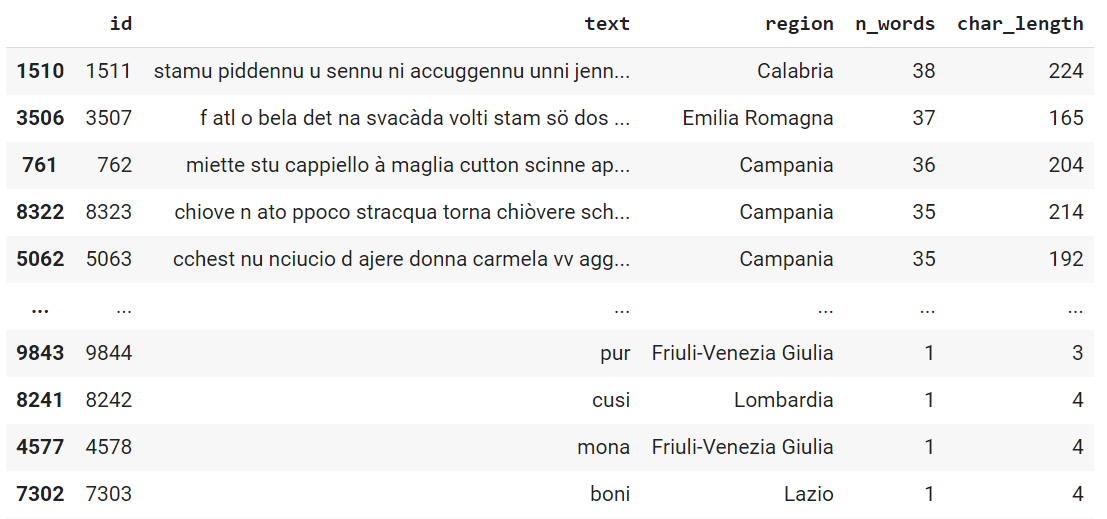

I testi una volta puliti rispettano la lunghezza massima definita per un tweet (280 caratteri). I testi nel training test, dunque, hanno una *lunghezza massima di 224 caratteri* e ***composti al massimo da 38 parole***

### **Rappresentazione Features**

L'estrazione delle features per questo preciso task rimane uno tra i procedimenti più peculiare dell'intero sviluppo del progetto. Qui, a partire dal testo, bisogna cercare di estrarre informazioni, attributi significati delle parole del testo. Inoltre è importante che il testo sia **rappresentabile** come input interpretabili per i modelli (*embedding*).

***Il problema principale che sorge in questa challenge è quello di natura linguistica***:

 dovendo implementare dei modelli che classificano un testo in base alla sua natura lingustica dialettale, non si ha ,ad esempio, la possibilità di poter utilizzare modelli pre-allenati per estrarre i vettori che rappresentano il significato, la sementica e la somiglianza tra le parole di un testo. Tra i migliori modelli pre-allenati non c'è sono attualmente quelli che elaborano dataset di linguaggi non standard, sopratutto in lingua italiana.

Dato ciò, per poter elaborare i tweet si è optato di uutilizzare:

- **Tokenization di Keras**: utilizzato pre entrambi i processing e per tutti i modelli di Keras implementanti. La tokenization di keras permette di trasformare tutte le parole dei testi in vettori numerici e di creare un vocabolario di tutte le parole indicizzate in base alla loro frequenza.

- come plus, si è testato l'utilizzo di **TF-IDF**(*Term Frequency - Inverse Document Frequency*): questa funzione permette conteggiare la frequenza delle parole e misurare la sua importanza in base alla sua frequenza; quindi, inoltre, permette di dare importanza alle parole "rare" che sono meno frequenti nel documento.

Il vantaggio assoluto che offre la Tokenization di Keras è che ti permette effettuare tutto il processo di *rappresentation learning* (creazione vocabolario, vettorizzazione delle parole).
Il principale svantaggio è che non conoscendo la natura e il significato delle parole dei testi, cerca di interprentarle dal documento in input.

Un altro importante vantaggio che fornisce questo metodo è quello che permette di ***rendere pronti i nostri testi come input dei modelli basati su reti neurali per la libreria Keras***

**KERAS TOKENIZATION**



```
#tokenization prepocessing standard
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text']) #  <-- Aggiorna/crea il vocabolario interno sulla base di un elenco di testi

X_train = tokenizer.texts_to_sequences(df_train['text']) # <-- Converte le parole di ogni testo nel suo indice corrispondente del vocabolario; ritorna la matrice con gli array delle frasi con parole indicizzate
#print("X_train[0]",X_train[0])
X_dev = tokenizer.texts_to_sequences(df_dev['text'])
#print("X_dev[0]",X_dev[0])

vocab_size = len(tokenizer.word_index) + 1 # Dimensione vocabolario: si aggiunge 1 per riservare l'indice 0
print("vocabulary size: ", vocab_size)

maxlen_train = max( len(x) for x in X_train) # <-- Massima lunghezza di parole per una frase nel train set
maxlen_dev = max( len(x) for x in X_dev) # <-- Massima lunghezza di parole per una frase nel dev set

print("maxlen train dataset: ", maxlen_train)
print("maxlen dev dataset: ", maxlen_dev)

# -- PADDING --
#Il padding permette di creare parole di vettori di uguali dimensioni, fondamentale per l'embedding

maxlen = maxlen_train

X_train = pad_sequences(X_train, padding= "post", maxlen = maxlen)
X_dev = pad_sequences(X_dev, padding ="post" , maxlen = maxlen)
print("After Padding ...")
print("X_train shape:", X_train.shape)
print("X_dev shape:", X_dev.shape)

_____________________________________
vocabulary size:  33014
maxlen train dataset:  38
maxlen dev dataset:  25
After Padding ...
X_train shape: (13653, 38)
X_dev shape: (552, 38)
```


Stesso procedimento è stato effettuato per il dataset di test e prendendo come input i dati preprocessati con il metodo di cleaner che mantiene significati gli *apostrofi*



```
# Tokenization del prepocessing con apostrofi
tokenizer_apo = Tokenizer()
tokenizer_apo.fit_on_texts(df_train_apo['text'])

X_train_apo = tokenizer_apo.texts_to_sequences(df_train_apo['text'])
#print("X_train_apo[0]",X_train_apo[0])
X_dev_apo = tokenizer_apo.texts_to_sequences(df_dev_apo['text'])
#print("X_dev_apo[0]",X_dev_apo[0])

vocab_size_apo = len(tokenizer_apo.word_index) + 1
print("vocabulary size con apostrofi: ", vocab_size_apo)

maxlen_train_apo = max( len(x) for x in X_train_apo)
maxlen_dev_apo = max( len(x) for x in X_dev_apo)

print("maxlen train dataset con apostrofi: ", maxlen_train_apo)
print("maxlen dev dataset con apostrofi: ", maxlen_dev_apo)

# PADDING
maxlen_apo = maxlen_train_apo

X_train_apo = pad_sequences(X_train_apo, padding= "post", maxlen = maxlen_apo)
X_dev_apo = pad_sequences(X_dev_apo, padding ="post" , maxlen = maxlen_apo)
print("After Padding ...")
print("X_train shape con apostrofi:", X_train_apo.shape)
print("X_dev shape con apostrofi:", X_dev_apo.shape)

____________________________________
vocabulary size con apostrofi:  36908
maxlen train dataset con apostrofi:  39
maxlen dev dataset con apostrofi:  25
After Padding ...
X_train shape con apostrofi: (13653, 39)
X_dev shape con apostrofi: (552, 39)
```



## **Modelli implementati**

### **Baselines**

Gli organizzatori della challenge hanno messo a disposizione per i diversi task delle baselines. Per il task in considerazione sono state fornite due modelli base:
- Most frequent baseline (MFB): modello che indovina sempre la regione più frequente nell'insieme di addestramento (cioè il Lazio) per tutte le istanze di validazione.
- Logistic Regression: modello di tipo probabilistico che stima la probabilità del verificarsi di un classe. L'implementazione è stata effettuata con *sklearn con i parametri di default*.

| Baseline name          | Precision | Recall | Macro F1 |
|------------------------|-----------|--------|----------|
| Most frequent baseline | 0.0160    | 0.0769 | 0.0265   |
| Logistic regression    | 0.7686    | 0.5389 | 0.5872   |

Come ulteriore baseline di supporto, e più valida della *most frequent baseline*, è stata implementato un **modello probabilistico tramite Naive Bayes** che utilizza come attributi rappresentativi del testo la **TF-IDF**

*Per questa baseline, per semplicità, si sono estratte le features dal dateset pre-processato con la funzione di cleaning standard dove sono stati eliminati anche gli apostrofi.*



```
# Estrazione delle features con TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF : le parole sono conteggiate per frequenza e poi calcolo  peso relativo (importanza della frequenza delle parole meno frequenti)
tfidf = TfidfVectorizer(max_features= 5000,stop_words=list(it_stop))

X_train_tfidf = tfidf.fit_transform(train_clean['text'])
X_dev_tfidf = tfidf.transform(dev_clean['text'])
```



Un ulteriore supporto al classificatore bayesiano è stato quello di utilizzare le **class weights**, permettendo al modello di osservare con più dettaglio alle classi sblilanciate.



```
from sklearn.utils import compute_sample_weight
from sklearn.utils import compute_class_weight

sample_weights = compute_sample_weight(class_weight = 'balanced', y = y_train)
```





```
# Modello bayesiano

from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB()
modelNB.fit(X_train_tfidf, y_train, sample_weights)#x train y train

predNB = modelNB.predict(X_dev_tfidf) #x dev

#evaluation
print(classification_report(y_dev, predNB, digits=4, target_names = labels))
```
                           precision    recall  f1-score   support

                  Abruzzo     0.0000    0.0000    0.0000         0
               Basilicata     0.0000    0.0000    0.0000         0
                 Calabria     0.8000    0.4444    0.5714        27
                 Campania     0.9136    0.8706    0.8916        85
           Emilia Romagna     0.6154    0.5333    0.5714        30
    Friuli-Venezia Giulia     0.5500    0.4400    0.4889        25
                    Lazio     0.8641    0.7739    0.8165       115
                  Liguria     0.8333    0.8000    0.8163        25
                Lombardia     0.8788    0.6744    0.7632        43
                   Marche     0.0000    0.0000    0.0000         0
                   Molise     0.0000    0.0000    0.0000         0
                 Piemonte     0.8571    0.7200    0.7826        25
                   Puglia     0.6667    0.4444    0.5333        27
                 Sardegna     0.9310    0.8710    0.9000        31
                  Sicilia     0.8000    0.7000    0.7467        40
                  Toscana     0.7931    0.6765    0.7302        34
      Trentino-Alto Adige     0.0000    0.0000    0.0000         0
                   Umbria     0.0000    0.0000    0.0000         0
            Valle d'Aosta     0.0000    0.0000    0.0000         0
                   Veneto     0.6170    0.6444    0.6304        45

                 accuracy                         0.7029       552
                macro avg     0.5060    0.4297    0.4621       552
             weighted avg     0.8052    0.7029    0.7475       552


### ***LSTM BASE - PRIMO MODELLO***

Il primo modello basato su reti neurali implementato è una semplice ***LSTM formata da 128 celle***, seguita da layers Dense che permettono di combinare le caratteristiche e produrre l'output



```
embedding_dim = 200


lstm_1 = Sequential()

lstm_1.add(Embedding(
    vocab_size,
    output_dim = embedding_dim,
    input_length = maxlen)) #output 3d (batch_size, input_length, output_dim) ->

lstm_1.add(LSTM(128, recurrent_dropout=0.2, return_sequences=True))
lstm_1.add(layers.Flatten())
lstm_1.add(Dense(64, activation = "relu"))
lstm_1.add(Dense(20, activation = "softmax"))

#end of model architecture

lstm_1.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ['accuracy'],)

lstm_1.summary()

_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 embedding_2 (Embedding)     (None, 38, 200)           6602800

 lstm_2 (LSTM)               (None, 38, 128)           168448

 flatten_2 (Flatten)         (None, 4864)              0

 dense_4 (Dense)             (None, 64)                311360

 dense_5 (Dense)             (None, 20)                1300

=================================================================
Total params: 7,083,908
Trainable params: 7,083,908
Non-trainable params: 0
_________________________________________________________________
```



Essendo il primo modello basato su reti neurali, come test si è utilizzato l'embedding che uso il testo pre-processato senza apostrofi. Questo modello è servito per fondare una sorta di base per gli altri modelli di tipo ANN.



```
history_lstm1 = lstm_1.fit(np.array(X_train), np.array(y_train_cat), epochs=10,
                    validation_data=(np.array(X_dev), np.array(y_dev_cat)),
                    batch_size=32,
                    callbacks=[stop_callbacks_list] <-- Permette di stoppare in anticipo il training quando la validation loss non migliora
                    )

Epoch 1/10
427/427 [==============================] - 109s 235ms/step - loss: 1.4866 - accuracy: 0.5981 - val_loss: 1.4398 - val_accuracy: 0.5435
Epoch 2/10
427/427 [==============================] - 95s 224ms/step - loss: 0.8049 - accuracy: 0.7760 - val_loss: 1.0746 - val_accuracy: 0.6975
Epoch 3/10
427/427 [==============================] - 97s 226ms/step - loss: 0.3975 - accuracy: 0.8861 - val_loss: 1.3069 - val_accuracy: 0.6812
Epoch 4/10
427/427 [==============================] - 98s 230ms/step - loss: 0.2117 - accuracy: 0.9395 - val_loss: 1.3747 - val_accuracy: 0.6938
Epoch 5/10
427/427 [==============================] - 95s 223ms/step - loss: 0.1172 - accuracy: 0.9686 - val_loss: 1.8346 - val_accuracy: 0.6268
```



NB: In questo particolare task non bisogna basarci troppo sui buoni risultati dell'accuracy, in quando abbiamo a che fare con un dataset sbilanciato. ***Nella fase di valutazione si vanno ad osservare attentamente i valori di precision, recall e f1-score*** (media ponderata tra precision e recall)

### ***LSTM - UPDATE con BI-LSTM***

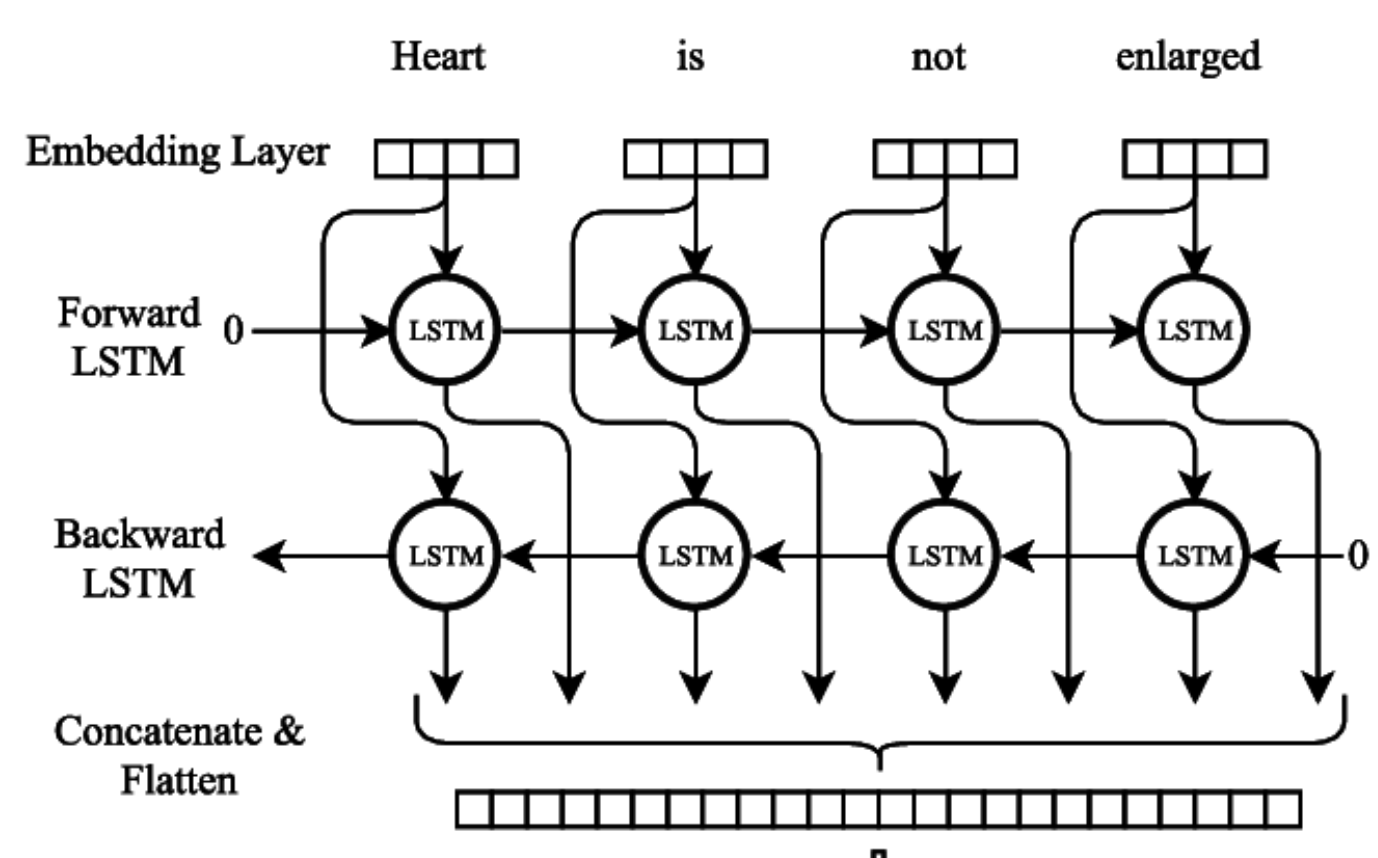

Questo modello è un'evoluzione della prima LSTM, ed è formata:

- Una ***Bi-LSTM***: LSTM bi-direzionale, consiste in due LSTM la quale una prende l'input in una direzione in avanti, l'altra in una direzione all'indietro; permette di aumentare la quantita di informazioni disponibili all'interno della rete

- ***2 Dense Layers*** da 128 e 64
- Output layer

*(Da questo modello in poi, si è utilizzati entrambi pre-proccesing dei testi)*



```
def LSTM_2(max_features, embedding_dims, maxlen, class_num=20, last_activation="softmax"):

  model = Sequential() # (?, ...)

  model.add(Embedding(max_features, embedding_dims, input_length=maxlen)) #(batch_size, maxlen, output_dim) -> (?, ... , ...))

  model.add(Bidirectional(LSTM(128, return_sequences=True)))
  model.add(layers.Flatten())
  model.add(Dense(128, activation = "relu"))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(64, activation = "relu"))
  model.add(keras.layers.Dropout(0.3))

  model.add(Dense(class_num, activation=last_activation)) # (? , ...) output layer

  model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
  model.summary()

  return model

#modello con preprocessing totale
model_2 = LSTM_2(vocab_size, 200, maxlen)

_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 embedding_3 (Embedding)     (None, 38, 200)           6602800

 bidirectional (Bidirectiona  (None, 38, 256)          336896
 l)

 flatten_3 (Flatten)         (None, 9728)              0

 dense_6 (Dense)             (None, 128)               1245312

 dropout (Dropout)           (None, 128)               0

 dense_7 (Dense)             (None, 64)                8256

 dropout_1 (Dropout)         (None, 64)                0

 dense_8 (Dense)             (None, 20)                1300

=================================================================
Total params: 8,194,564
Trainable params: 8,194,564
Non-trainable params: 0
_________________________________________________________________

history_lstm_2 = model_2.fit(np.array(X_train), np.array(y_train_cat), epochs=10,
                    validation_data=(np.array(X_dev), np.array(y_dev_cat)),
                    batch_size=32,
                    callbacks=[stop_callbacks_list])
Epoch 1/10
427/427 [==============================] - 127s 283ms/step - loss: 1.6131 - accuracy: 0.5810 - val_loss: 1.7149 - val_accuracy: 0.4529
Epoch 2/10
427/427 [==============================] - 120s 281ms/step - loss: 1.0294 - accuracy: 0.7205 - val_loss: 1.3132 - val_accuracy: 0.5851
Epoch 3/10
427/427 [==============================] - 121s 283ms/step - loss: 0.6831 - accuracy: 0.7995 - val_loss: 1.3616 - val_accuracy: 0.6775
Epoch 4/10
427/427 [==============================] - 120s 280ms/step - loss: 0.4571 - accuracy: 0.8640 - val_loss: 1.3408 - val_accuracy: 0.6884
Epoch 5/10
427/427 [==============================] - 133s 311ms/step - loss: 0.3056 - accuracy: 0.9099 - val_loss: 1.3979 - val_accuracy: 0.6812
```





```
#modello con preprocessing con uso di apostrofi

model_2_apo = LSTM_2(vocab_size_apo, 200, maxlen_apo)

history_2_apo = model_2_apo.fit(np.array(X_train_apo), np.array(y_train_cat), epochs=10,
                    validation_data=(np.array(X_dev_apo), np.array(y_dev_cat)),
                    batch_size=32,
                    callbacks=stop_callbacks_list)
Epoch 1/10
427/427 [==============================] - 185s 407ms/step - loss: 1.6071 - accuracy: 0.5661 - val_loss: 1.6012 - val_accuracy: 0.4909
Epoch 2/10
427/427 [==============================] - 128s 299ms/step - loss: 0.9692 - accuracy: 0.7332 - val_loss: 1.2794 - val_accuracy: 0.6087
Epoch 3/10
427/427 [==============================] - 127s 296ms/step - loss: 0.5950 - accuracy: 0.8261 - val_loss: 1.2281 - val_accuracy: 0.6594
Epoch 4/10
427/427 [==============================] - 123s 289ms/step - loss: 0.3524 - accuracy: 0.8966 - val_loss: 1.3994 - val_accuracy: 0.6739
Epoch 5/10
427/427 [==============================] - 128s 301ms/step - loss: 0.2074 - accuracy: 0.9382 - val_loss: 1.6827 - val_accuracy: 0.6703
Epoch 6/10
427/427 [==============================] - 122s 286ms/step - loss: 0.1408 - accuracy: 0.9595 - val_loss: 1.6730 - val_accuracy: 0.6685
```



Dalla fase di training si può notare che entrambi modelli, per quanto riguarda l'accuratezza, hanno risultati abbastanza simili.

### ***BILSTM + TF-IDF FEATURES***

L'ultimo modello basato su BILSTM utilizza come supporto, le features generate da TF-IDF. Il modello prima elabora separametamente le frasi tokenizzate tramite la LSTM, e le features TF-IDF tramite una semplice MLP; poi concatena i loro risultati e li passano su una MLP composta da 2 Dense layers.


L'idea di per questo modello era quella di sfruttare le potenzialità delle LSTM, cercando di imparare tramite "sequence learning", combinare il tutto con i risultati ottenuti dalla funzione TF-IDF che ritorna i valori dei migliori vocaboli che rappresentano le labels.



```
#TF-IDF : le parole sono conteggiate per frequenza e poi calcolato un peso relativo (importanza della frequenza delle parole meno frequenti)

# utilizzo degli ngrams nella funzione

tfidf_ngrams = TfidfVectorizer(ngram_range=(1,3), max_features= 500, stop_words = list(it_stop))

X_train_tfidf = tfidf_ngrams.fit_transform(df_train['text']).toarray()
X_dev_tfidf = tfidf_ngrams.transform(df_dev['text']).toarray()
print('Train size: ',X_train_tfidf.shape)
print('dev size: ',X_dev_tfidf.shape)

print("X_train shape:", X_train.shape)
print("X_dev shape:", X_dev.shape)
print('Train tfidf ngrams size: ',X_train_tfidf.shape)
print('dev tfidf ngramssize: ',X_dev_tfidf.shape)

Train size:  (13653, 500)
dev size:  (552, 500)
X_train shape: (13653, 38)
X_dev shape: (552, 38)
Train tfidf ngrams size:  (13653, 500)
dev tfidf ngramssize:  (552, 500)
__________________________________________

tfidf_ngrams_apo = TfidfVectorizer(ngram_range=(1,3), max_features= 500, stop_words = list(it_stop))

X_train_tfidf_apo = tfidf_ngrams_apo.fit_transform(df_train_apo['text']).toarray()
X_dev_tfidf_apo = tfidf_ngrams_apo.transform(df_dev_apo['text']).toarray()
print("X_train shape:", X_train_apo.shape)
print("X_dev shape:", X_dev_apo.shape)
print('Train tfidf ngrams size: ',X_train_tfidf_apo.shape)
print('dev tfidf ngramssize: ',X_dev_tfidf_apo.shape)

X_train shape: (13653, 39)
X_dev shape: (552, 39)
Train tfidf ngrams size:  (13653, 500)
dev tfidf ngramssize:  (552, 500)

```





```
def LSTM_TFIDF(max_features, embedding_dims, maxlen, tfidf_dim, class_num=20, last_activation="softmax"):

  input_lstm = Input(shape=(maxlen,))
  input = Input(shape=(tfidf_dim,))

  embedding_layer = Embedding(max_features, output_dim = embedding_dims, input_length = maxlen)
  embedded_sequences = embedding_layer(input_lstm)

  lstm = Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2,
                            kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))(embedded_sequences)
  lstm = Flatten()(lstm)
  lstm = Dense(128, activation = "relu")(lstm)
  lstm = Dropout(0.3)(lstm)
  lstm = Dense(64, activation = "relu")(lstm)
  lstm = Dropout(0.3)(lstm)

  ngrams_dense = Dense(128, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(input)
  ngrams_dense = Dropout(0.3)(ngrams_dense)
  ngrams_dense = Dense(64, activation="relu")(ngrams_dense)
  ngrams_dense = Dropout(0.3)(ngrams_dense)

  concat_layer = Concatenate()([lstm, ngrams_dense])
  concat_layer = Flatten()(concat_layer)

  dense = Dense(64, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(concat_layer)
  dense = Dropout(0.2)(dense)
  output = Dense(20, activation = "softmax")(dense)

  model =  Model([input_lstm, input], output)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  # Plot model graph
  #tf.keras.utils.plot_model(model, show_shapes=True)

  return model


model_lstm_tfidf = LSTM_TFIDF(vocab_size, 200, maxlen, 500)

__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to
==================================================================================================
 input_1 (InputLayer)           [(None, 38)]         0           []

 embedding_4 (Embedding)        (None, 38, 200)      6602800     ['input_1[0][0]']

 bidirectional_1 (Bidirectional  (None, 38, 256)     336896      ['embedding_4[0][0]']
 )

 flatten_4 (Flatten)            (None, 9728)         0           ['bidirectional_1[0][0]']

 input_2 (InputLayer)           [(None, 500)]        0           []

 dense_9 (Dense)                (None, 128)          1245312     ['flatten_4[0][0]']

 dense_11 (Dense)               (None, 128)          64128       ['input_2[0][0]']

 dropout_2 (Dropout)            (None, 128)          0           ['dense_9[0][0]']

 dropout_4 (Dropout)            (None, 128)          0           ['dense_11[0][0]']

 dense_10 (Dense)               (None, 64)           8256        ['dropout_2[0][0]']

 dense_12 (Dense)               (None, 64)           8256        ['dropout_4[0][0]']

 dropout_3 (Dropout)            (None, 64)           0           ['dense_10[0][0]']

 dropout_5 (Dropout)            (None, 64)           0           ['dense_12[0][0]']

 concatenate (Concatenate)      (None, 128)          0           ['dropout_3[0][0]',
                                                                  'dropout_5[0][0]']

 flatten_5 (Flatten)            (None, 128)          0           ['concatenate[0][0]']

 dense_13 (Dense)               (None, 64)           8256        ['flatten_5[0][0]']

 dropout_6 (Dropout)            (None, 64)           0           ['dense_13[0][0]']

 dense_14 (Dense)               (None, 20)           1300        ['dropout_6[0][0]']

==================================================================================================
Total params: 8,275,204
Trainable params: 8,275,204
Non-trainable params: 0
__________________________________________________________________________________________________
```



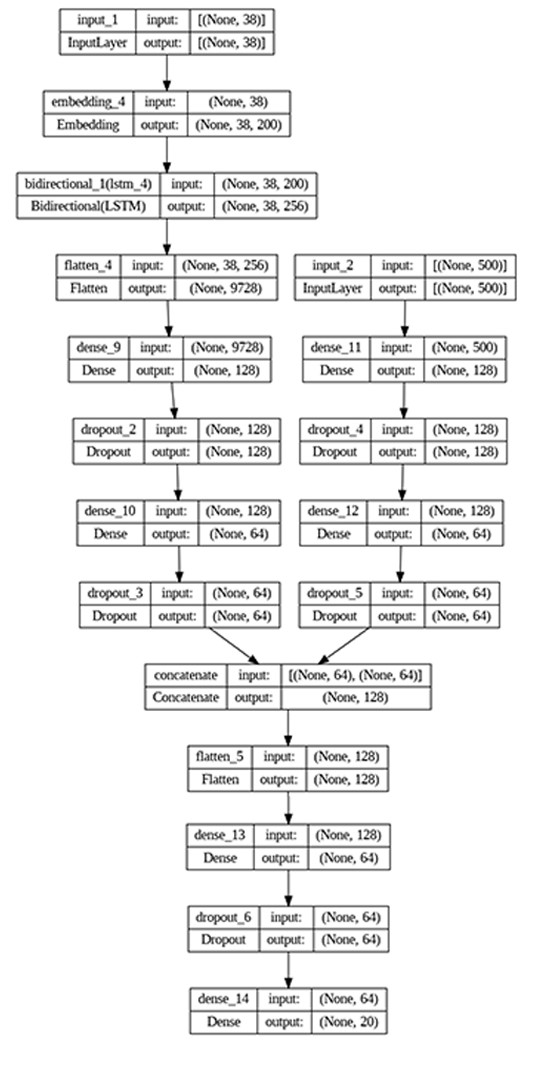



```
history_lstm_tfidf = model_lstm_tfidf.fit(x=[X_train, X_train_tfidf],
                        y=y_train_cat,
                        batch_size = 32,
                        epochs = 10,
                        verbose = 1,
                        validation_data = ([X_dev, X_dev_tfidf], y_dev_cat),
                        callbacks = [stop_callbacks_list],
                        #class_weight = dict_weights
                        )
Epoch 1/10
427/427 [==============================] - 187s 422ms/step - loss: 1.6439 - accuracy: 0.5483 - val_loss: 1.6220 - val_accuracy: 0.4783
Epoch 2/10
427/427 [==============================] - 176s 413ms/step - loss: 1.0926 - accuracy: 0.6903 - val_loss: 1.4132 - val_accuracy: 0.5362
Epoch 3/10
427/427 [==============================] - 180s 422ms/step - loss: 0.8189 - accuracy: 0.7546 - val_loss: 1.4240 - val_accuracy: 0.5725
Epoch 4/10
427/427 [==============================] - 187s 437ms/step - loss: 0.6226 - accuracy: 0.8088 - val_loss: 1.3558 - val_accuracy: 0.6377
Epoch 5/10
427/427 [==============================] - 183s 428ms/step - loss: 0.4637 - accuracy: 0.8547 - val_loss: 1.3432 - val_accuracy: 0.6359
Epoch 6/10
427/427 [==============================] - 181s 423ms/step - loss: 0.3614 - accuracy: 0.8852 - val_loss: 1.4893 - val_accuracy: 0.6721
Epoch 7/10
427/427 [==============================] - 193s 452ms/step - loss: 0.2965 - accuracy: 0.9087 - val_loss: 1.4600 - val_accuracy: 0.6540
Epoch 8/10
427/427 [==============================] - 194s 454ms/step - loss: 0.2393 - accuracy: 0.9301 - val_loss: 1.6151 - val_accuracy: 0.6830
```



### ***CNN***

Oltre all'utilizzo delle LSTM, sono stati definiti e provati anche modelli **CNN**. I modelli basati su reti convolutive possono offrire ottime performance anche nel campo della text classification. Il loro punto di forza è che sono "***shift-invariant***" permettendo di catturare le informazioni generali dell'input e portelo classificare non basandosi sul suo posizionamento.

Sono state definite 3 modelli di CNN:



1.   ***CNN Base***: formata da un Conv1D layer di dimensioni 512 + Un dense layer + Ouput
2.   ***Deep CNN***: sono state delineate due modelli di questo tipo:
 - ***CNN con 3 filtri***: ( 256 x 3 + 256 x 4 +
256 x 5 + CONCAT + DENSE LAYERS + OUTPUT )
 - ***CNN con 3 filtri***: "( 512 x 2 + 512 x 3 +
512 x 4 + CONCAT + DENSE LAYERS + OUTPUT )
 - ***CNN con 3 filtri***: "( 512 x 3 + 512 x 4 +
512 x 5 + CONCAT + DENSE LAYERS + OUTPUT )







**CNN BASE**



```
# CNN BASE

def CNN_1(max_features, embedding_dims, conv_dim, maxlen, class_num=20, last_activation="softmax"):

  model = Sequential() # (?, ...)

  model.add(Embedding(max_features, embedding_dims, input_length=maxlen)) #(batch_size, maxlen, output_dim) -> (?, ... , ...))

  model.add(Conv1D(conv_dim, 3, activation='relu'))
  model.add(GlobalMaxPool1D())

  model.add(Dense(128, activation = "relu"))
  model.add(keras.layers.Dropout(0.3))

  model.add(Dense(class_num, activation=last_activation)) # (? , ...) output layer

  model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
  model.summary()

  return model

model_cnn = CNN_1(vocab_size, 200, 512, maxlen)

model_cnn_apo = CNN_1(vocab_size_apo, 200, 512, maxlen_apo)
```



**DEEP CNN**

*esempio di un plot della deep cnn*

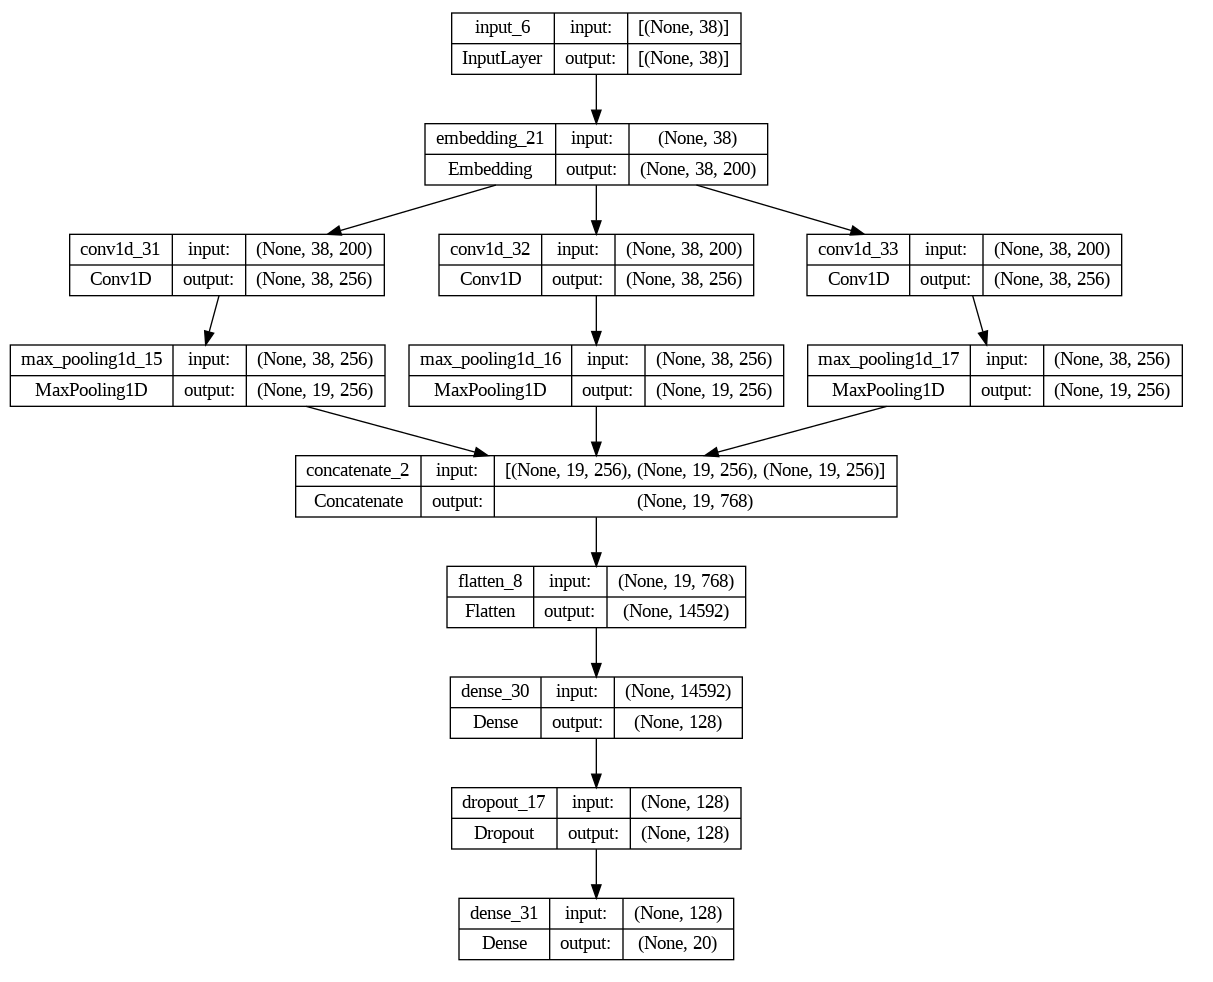



```
def CNN_deep(max_features, embedding_dims, conv_dim, maxlen, class_num=20, last_activation="softmax"):

  sequence_input = Input(shape=(maxlen,))

  embedding_layer = Embedding(max_features, embedding_dims, input_length=maxlen) #(batch_size, maxlen, output_dim) -> (?, ... , ...))

  embedded_sequences = embedding_layer(sequence_input)

  convs = []
  filter_sizes = [3,4,5]

  for fsz in filter_sizes:
    x = Conv1D(conv_dim, fsz, activation='relu',padding='same')(embedded_sequences)
    x = MaxPooling1D()(x)
    convs.append(x)

  x = Concatenate(axis=-1)(convs)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.3)(x)
  #x = Dense(64, activation='relu')(x)
  #x = Dropout(0.3)(x)
  output = Dense(class_num, activation = last_activation)(x)

  model = Model(sequence_input, output)

  model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
  model.summary()

  return model

___________________________

cnn_deep = CNN_deep(vocab_size, 200, 256, maxlen)
cnn_deep_apo = CNN_deep(vocab_size_apo, 200, 256, maxlen_apo)


```





```
def CNN_deep_2(max_features, embedding_dims, maxlen, class_num=20, last_activation="softmax"):

  sequence_input = Input(shape=(maxlen,))

  embedding_layer = Embedding(max_features, embedding_dims, input_length=maxlen) #(batch_size, maxlen, output_dim) -> (?, ... , ...))

  embedded_sequences = embedding_layer(sequence_input)

  convs = []
  filter_sizes = [2,3,4]

  for fsz in filter_sizes:
    x = Conv1D(512, fsz, activation='relu',padding='same')(embedded_sequences)
    x = MaxPooling1D()(x)
    convs.append(x)

  x = Concatenate(axis=-1)(convs)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.3)(x)
  output = Dense(class_num, activation = last_activation)(x)

  model = Model(sequence_input, output)

  model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
  model.summary()

  return model

_____________________________

cnn_deep_2 = CNN_deep_2(vocab_size, 200, maxlen)
```





```
def CNN_deep_3(max_features, embedding_dims, maxlen, class_num=20, last_activation="softmax"):

  sequence_input = Input(shape=(maxlen,))

  embedding_layer = Embedding(max_features, embedding_dims, input_length=maxlen) #(batch_size, maxlen, output_dim) -> (?, ... , ...))

  embedded_sequences = embedding_layer(sequence_input)

  convs = []
  filter_sizes = [3,4,5]

  for fsz in filter_sizes:
    x = Conv1D(512, fsz, activation='relu',padding='same')(embedded_sequences)
    x = GlobalMaxPool1D()(x) <--- utilizzo del globalmaxpoling
    convs.append(x)

  x = Concatenate(axis=-1)(convs)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.4)(x) <------------------- dropout più elevato
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.4)(x)
  output = Dense(class_num, activation = last_activation)(x)

  model = Model(sequence_input, output)

  model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
  model.summary()

  return model

_______________________________

cnn_deep_3 = CNN_deep_3(vocab_size_apo, 200, maxlen_apo)
cnn_deep_3_1 = CNN_deep_3(vocab_size, 200, maxlen)
```



## **Evaluation**

Per la valutazione dei modelli si è utilizzato il metodo di *sklearn* denominato ***classification_report***. ***Questo metodo permette di andare a calcolare e riportare per ogni classe predetta, la precision, la recall, e la f1-score***.

Si è definita una funzione che dato un modello in input, vengono eseguite le predizioni ed effettuate le valutazioni. Inoltre viene utilizzato anche i metodi ***confusion_matrix e plot_confusion_matrix*** per generare la matrice di confusione.



```
def evaluation(model, X, y):
    print(f"Prediction labels on sample ...")
    pred = model.predict(X)
    pred = np.argmax(pred, axis=1)
    print(f"Evaluation in course ... ")
    print(f"Classification Report & Confusion Matrix ... ")
    print(classification_report(y, pred))
    print("\n")
    cm = confusion_matrix(y, pred)
    plot_confusion_matrix(conf_mat=cm, figsize=(8,8))
```



Di seguito un esempio della valutazione di un modello basato su CNN



```
# Modello CNN DEEP con 3 filtri di dimensione 3 , 4 e 5

cnn_deep_3 = CNN_deep_3(vocab_size_apo, 200, maxlen_apo)

__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to
==================================================================================================
 input_5 (InputLayer)           [(None, 39)]         0           []

 embedding_24 (Embedding)       (None, 39, 200)      7382600     ['input_5[0][0]']

 conv1d_39 (Conv1D)             (None, 39, 512)      307712      ['embedding_24[0][0]']

 conv1d_40 (Conv1D)             (None, 39, 512)      410112      ['embedding_24[0][0]']

 conv1d_41 (Conv1D)             (None, 39, 512)      512512      ['embedding_24[0][0]']

 global_max_pooling1d_17 (Globa  (None, 512)         0           ['conv1d_39[0][0]']
 lMaxPooling1D)

 global_max_pooling1d_18 (Globa  (None, 512)         0           ['conv1d_40[0][0]']
 lMaxPooling1D)

 global_max_pooling1d_19 (Globa  (None, 512)         0           ['conv1d_41[0][0]']
 lMaxPooling1D)

 concatenate_4 (Concatenate)    (None, 1536)         0           ['global_max_pooling1d_17[0][0]',
                                                                  'global_max_pooling1d_18[0][0]',
                                                                  'global_max_pooling1d_19[0][0]']

 flatten_8 (Flatten)            (None, 1536)         0           ['concatenate_4[0][0]']

 dense_56 (Dense)               (None, 128)          196736      ['flatten_8[0][0]']

 dropout_32 (Dropout)           (None, 128)          0           ['dense_56[0][0]']

 dense_57 (Dense)               (None, 64)           8256        ['dropout_32[0][0]']

 dropout_33 (Dropout)           (None, 64)           0           ['dense_57[0][0]']

 dense_58 (Dense)               (None, 20)           1300        ['dropout_33[0][0]']

==================================================================================================
Total params: 8,819,228
Trainable params: 8,819,228
Non-trainable params: 0
__________________________________________________________________________________________________

history_cnn_deep_3 = cnn_deep_3.fit(np.array(X_train_apo), np.array(y_train_cat), epochs=10,
                    validation_data=(np.array(X_dev_apo), np.array(y_dev_cat)),
                    batch_size=32,
                    callbacks=[stop_callbacks_list]
                                  )

Epoch 1/10
427/427 [==============================] - 117s 271ms/step - loss: 1.7044 - accuracy: 0.5509 - val_loss: 1.7894 - val_accuracy: 0.4384
Epoch 2/10
427/427 [==============================] - 113s 265ms/step - loss: 1.1646 - accuracy: 0.6745 - val_loss: 1.6368 - val_accuracy: 0.5254
Epoch 3/10
427/427 [==============================] - 110s 257ms/step - loss: 0.8593 - accuracy: 0.7502 - val_loss: 1.3788 - val_accuracy: 0.6069
Epoch 4/10
427/427 [==============================] - 110s 257ms/step - loss: 0.6718 - accuracy: 0.7936 - val_loss: 1.4227 - val_accuracy: 0.6540
Epoch 5/10
427/427 [==============================] - 109s 256ms/step - loss: 0.5371 - accuracy: 0.8340 - val_loss: 1.4109 - val_accuracy: 0.6866
Epoch 6/10
427/427 [==============================] - 112s 262ms/step - loss: 0.4403 - accuracy: 0.8590 - val_loss: 1.4063 - val_accuracy: 0.7065

________________________________
Evaluation

evaluation(cnn_deep_3, X_dev_apo, y_dev)

Prediction labels on sample ...
18/18 [==============================] - 2s 113ms/step
Evaluation in course ...
Classification Report & Confusion Matrix ...
              precision    recall  f1-score   support

           2       0.58      0.52      0.55        27
           3       0.85      0.88      0.87        85
           4       0.41      0.53      0.46        30
           5       0.43      0.12      0.19        25
           6       0.76      0.94      0.84       115
           7       0.91      0.40      0.56        25
           8       0.79      0.70      0.74        43
          11       0.53      0.76      0.62        25
          12       1.00      0.33      0.50        27
          13       0.88      0.74      0.81        31
          14       0.66      0.72      0.69        40
          15       0.54      0.62      0.58        34
          19       0.69      0.73      0.71        45

    accuracy                           0.71       552
   macro avg       0.69      0.62      0.62       552
weighted avg       0.72      0.71      0.69       552


evaluation(cnn_deep_3, X_test_apo, y_test)

Prediction labels on sample ...
26/26 [==============================] - 1s 57ms/step
Evaluation in course ...
Classification Report & Confusion Matrix ...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           2       0.49      0.74      0.59        27
           3       0.83      0.88      0.85       128
           4       0.31      0.36      0.33        45
           5       0.33      0.08      0.13        25
           6       0.76      0.91      0.83       173
           7       0.89      0.32      0.47        25
           8       0.61      0.67      0.64        64
           9       0.00      0.00      0.00        16
          11       0.44      0.56      0.49        25
          12       0.42      0.19      0.26        27
          13       0.97      0.66      0.78        47
          14       0.73      0.77      0.75        60
          15       0.42      0.69      0.52        51
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00        14
          19       0.73      0.81      0.77        67

    accuracy                           0.66       818
   macro avg       0.47      0.45      0.44       818
weighted avg       0.63      0.66      0.63       818

```



***Tutti risultati ottenuti per ogni modello sono stati raccolti all'interno di un file excel, per essere poi analizzati e discussi***

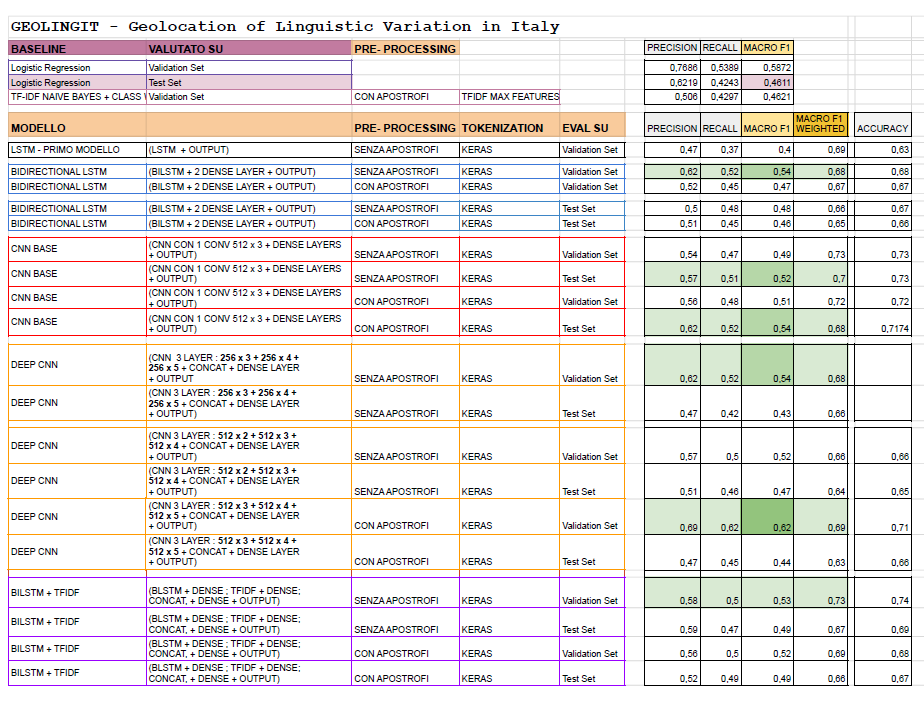

**OSSERVAZIONI FINALI**

- i modelli basati su LSTM hanno avuto risultati simili su entrambi tipi di pre-processing; L'upgrade con la Bidirectional LSTM è stato effettivamente buono, migliorando le prestazioni del modello precedente

- L'utilizzo addizionale di features tramite TFIDF non hanno portato ad un valido aumento delle permormance rispetto al modello BILSTM

- Le CNN hanno fin da subito mostrato ottimi segnali, sia quelle con una configurazione più semplice, sia quelle più articolate

- Il modello CNN che utilizza 3 filtri di dimensione variabile, si è dimostrato il più prestazionale con i dati di validazione, meno ottimale con i dati di test

- il modello basato su rete convolutiva CNN base è ha mostrato buoni risultati anche per i dati di test e con entrambi tipi di preprocessing
